<a href="https://colab.research.google.com/github/singhbhupender1/DataSciencePortfolio/blob/master/Face_detection_using_OpenCV_and_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face detection is a computer vision problem that involves finding faces in photos.

It is a trivial problem for humans to solve and has been solved reasonably well by classical feature-based techniques, such as the cascade classifier. More recently deep learning methods have achieved state-of-the-art results on standard benchmark face detection datasets. One example is the Multi-task Cascade Convolutional Neural Network, or MTCNN for short.

# Overview
This is divided into four parts; they are:

1. Face Detection
2. Test Photographs
3. Face Detection With OpenCV
4. Face Detection With Deep Learning

#Face Detection
Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph.

Locating a face in a photograph refers to finding the coordinate of the face in the image, whereas localization refers to demarcating the extent of the face, often via a bounding box around the face.

Given a photograph, a face detection system will output zero or more bounding boxes that contain faces. Detected faces can then be provided as input to a subsequent system, such as a face recognition system.

There are perhaps two main approaches to face recognition: **feature-based methods** that use hand-crafted filters to search for and detect faces, and **image-based methods** that learn holistically how to extract faces from the entire image.



#Test Photographs

To keep things simple, we will use two test images: one with two faces, and one with many faces. 

Download the image and place it in your current working directory with the filename ‘test1.jpg‘.

![test1.jpg](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg)


In [2]:
!wget 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg'

--2020-03-10 02:34:18--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142525 (139K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>] 139.18K  --.-KB/s    in 0.008s  

2020-03-10 02:34:18 (18.1 MB/s) - ‘test1.jpg’ saved [142525/142525]



The second image is a photograph of a number of people on a swim team.
Download the image and place it in your current working directory with the filename ‘test2.jpg‘.

![test2.jpg](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg)

In [4]:
!wget 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg'

--2020-03-10 02:35:59--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152282 (149K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>] 148.71K  --.-KB/s    in 0.008s  

2020-03-10 02:35:59 (18.2 MB/s) - ‘test2.jpg’ saved [152282/152282]



#Face Detection With OpenCV

Feature-based face detection algorithms are fast and effective and have been used successfully for decades.

Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper titled “Rapid Object Detection using a Boosted Cascade of Simple Features.”

In the paper, effective features are learned using the AdaBoost algorithm, although importantly, multiple models are organized into a hierarchy or “cascade.

Simpler classifiers operate on candidate face regions directly, acting like a coarse filter, whereas complex classifiers operate only on those candidate regions that show the most promise as faces.

The result is a very fast and effective face detection algorithm that has been the basis for face detection in consumer products, such as cameras.

A modern implementation of the Classifier Cascade face detection algorithm is provided in the OpenCV library. This is a C++ computer vision library that provides a python interface. The benefit of this implementation is that it provides pre-trained face detection models, and provides an interface to train a model on your own dataset.

OpenCV can be installed by the package manager system on your platform, or via pip; for example:

In [5]:
!pip install opencv-python


Once the installation process is complete, it is important to confirm that the library was installed correctly.

This can be achieved by importing the library and checking the version number; for example:

In [6]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.1.2


OpenCV provides the CascadeClassifier class that can be used to create a cascade classifier for face detection. The constructor can take a filename as an argument that specifies the XML file for a pre-trained model.

OpenCV provides a number of pre-trained models as part of the installation. These are available on your system and are also available on the [OpenCV GitHub project](https://github.com/opencv/opencv/tree/master/data/haarcascades).

Download a pre-trained model for frontal face detection from the OpenCV GitHub project and place it in your current working directory with the filename ‘haarcascade_frontalface_default.xml‘.

[haarcascade_frontalface_default.xml](https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml)

Once downloaded, we can load the model as follows:



```
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
```

Once loaded, the model can be used to perform face detection on a photograph by calling the detectMultiScale() function.

This function will return a list of bounding boxes for all faces detected in the photograph.



```
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)
```





We can demonstrate this with an example with the college students photograph (test.jpg).

The photo can be loaded using OpenCV via the imread() function.



```
# load the photograph
pixels = imread('test1.jpg')
```



The complete code of performing face detection on the college students photograph with a pre-trained cascade classifier in OpenCV is listed below.

In [7]:
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import CascadeClassifier
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)

[174  75 107 107]
[360 102 101 101]


Running the example first loads the photograph, then loads and configures the cascade classifier; faces are detected and each bounding box is printed.

Each box lists the x and y coordinates for the bottom-left-hand-corner of the bounding box, as well as the width and the height. The results suggest that two bounding boxes were detected.

We can update the example to plot the photograph and draw each bounding box.

This can be achieved by drawing a rectangle for each box directly over the pixels of the loaded image using the rectangle() function that takes two points.



```
# extract
x, y, width, height = box
x2, y2 = x + width, y + height
# draw a rectangle over the pixels
rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
```

We can then plot the photograph and keep the window open until we press a key to close it.



```
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()
```





The complete code is listed below.

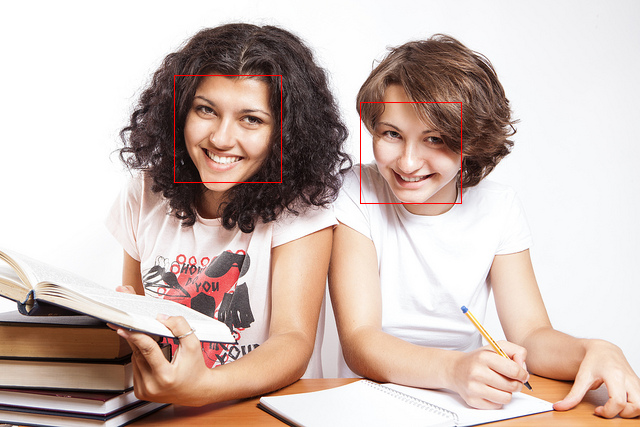

In [12]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from google.colab.patches import cv2_imshow
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

We can try the same code on the second photograph of the swim team, specifically ‘test2.jpg‘.

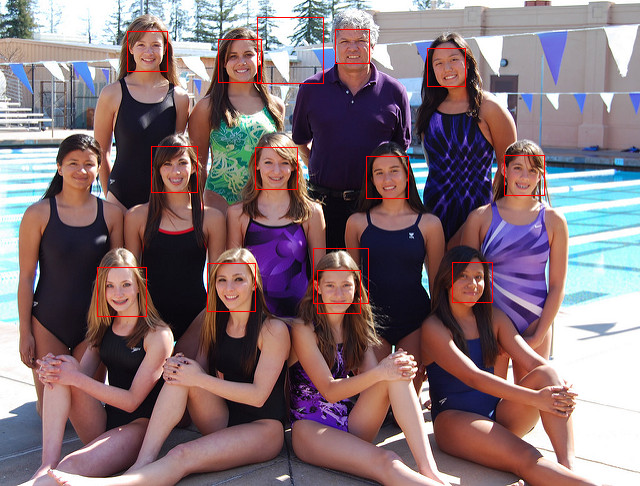

In [14]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from google.colab.patches import cv2_imshow
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

Running the example, we can see that many of the faces were detected correctly, but the result is not perfect.

We can see that a face on the first or bottom row of people was detected twice, that a face on the middle row of people was not detected, and that the background on the third or top row was detected as a face.

The detectMultiScale() function provides some arguments to help tune the usage of the classifier. Two parameters of note are scaleFactor and minNeighbors; for example:



```
# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.1, 3)
```



The **scaleFactor** controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image. The default value is 1.1 (10% increase), although this can be lowered to values such as 1.05 (5% increase) or raised to values such as 1.4 (40% increase).

The **minNeighbors** determines how robust each detection must be in order to be reported, e.g. the number of candidate rectangles that found the face. The default is 3, but this can be lowered to 1 to detect a lot more faces and will likely increase the false positives, or increase to 6 or more to require a lot more confidence before a face is detected.

The **scaleFactor** and **minNeighbors** often require tuning for a given image or dataset in order to best detect the faces. It may be helpful to perform a sensitivity analysis across a grid of values and see what works well or best in general on one or multiple photographs.

A fast strategy may be to lower (or increase for small photos) the scaleFactor until all faces are detected, then increase the **minNeighbors** until all false positives disappear, or close to it.

With some tuning, I found that a **scaleFactor** of 1.05 successfully detected all of the faces, but the background detected as a face did not disappear until a minNeighbors of 8, after which three faces on the middle row were no longer detected.



```
# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)
```



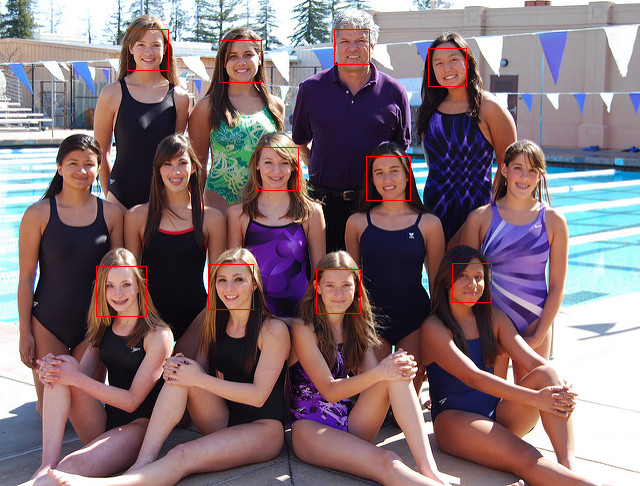

In [15]:
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

The results are not perfect, and perhaps better results can be achieved with further tuning, and perhaps post-processing of the bounding boxes.

#Face Detection With Deep Learning

A number of deep learning methods have been developed and demonstrated for face detection.

Perhaps one of the more popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

The proposed CNNs consist of three stages. In the first stage, it produces candidate windows quickly through a shallow CNN. Then, it refines the windows to reject a large number of non-faces windows through a more complex CNN. Finally, it uses a more powerful CNN to refine the result and output facial landmarks positions.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/Pipeline-for-the-Multi-Task-Cascaded-Convolutional-Neural-Network.png)

The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.

The three models are not connected directly; instead, outputs of the previous stage are fed as input to the next stage. This allows additional processing to be performed between stages; for example, non-maximum suppression (NMS) is used to filter the candidate bounding boxes proposed by the first-stage P-Net prior to providing them to the second stage R-Net model.

The MTCNN project, which we will refer to as ipazc/MTCNN to differentiate it from the name of the network, provides an implementation of the MTCNN architecture using TensorFlow and OpenCV. There are two main benefits to this project; first, it provides a top-performing pre-trained model and the second is that it can be installed as a library ready for use in your own code.

The library can be installed via pip; for example:

In [16]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 9.6MB/s 


You can then confirm that the library was installed correctly via pip; for example:


In [17]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: opencv-python, keras
Required-by: 


In [19]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


You can also confirm that the library was installed correctly via Python, as follows:

In [20]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Running the example will load the library, confirming it was installed correctly; and print the version.

An instance of the network can be created by calling the MTCNN() constructor.

By default, the library will use the pre-trained model, although you can specify your own model via the ‘weights_file‘ argument and specify a path or URL, for example:



```
model = MTCNN(weights_file='filename.npy')
```



The minimum box size for detecting a face can be specified via the *‘min_face_size‘* argument, which defaults to 20 pixels. The constructor also provides a *‘scale_factor‘* argument to specify the scale factor for the input image, which defaults to 0.709.

Once the model is configured and loaded, it can be used directly to detect faces in photographs by calling the *detect_faces()* function.

This returns a list of dict object, each providing a number of keys for the details of each face detected, including:

*‘box‘*: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
*‘confidence‘*: The probability confidence of the prediction.
*‘keypoints‘*: Providing a dict with dots for the *‘left_eye‘*, *‘right_eye‘*, *‘nose‘*, *‘mouth_left‘*, and *‘mouth_right‘*.
For example, we can perform face detection on the college students photograph as follows:

For example, we can perform face detection on the college students photograph as follows:

In [21]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)











{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


Running the example loads the photograph, loads the model, performs face detection, and prints a list of each face detected.

We can draw the boxes on the image by first plotting the image with matplotlib, then creating a Rectangle object using the x, y and width and height of a given bounding box; for example:



```
# get coordinates
x, y, width, height = result['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
```
Below is a function named draw_image_with_boxes() that shows the photograph and then draws a box for each bounding box detected.



```
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
```







The complete example making use of this function is listed below.

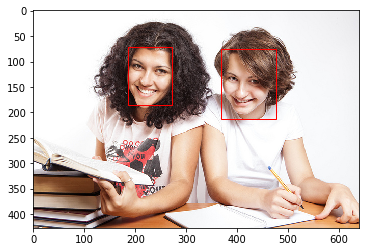

In [22]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

Running the example plots the photograph then draws a bounding box for each of the detected faces.

We can see that both faces were detected correctly.

We can draw a circle via the Circle class for the eyes, nose, and mouth; for example



```
# draw the dots
for key, value in result['keypoints'].items():
	# create and draw dot
	dot = Circle(value, radius=2, color='red')
	ax.add_patch(dot)
```



The complete example with this addition to the draw_image_with_boxes() function is listed below.

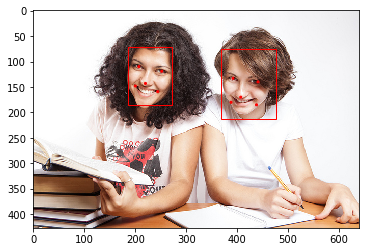

In [24]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

The example plots the photograph again with bounding boxes and facial key points.

We can see that eyes, nose, and mouth are detected well on each face, although the mouth on the right face could be better detected, with the points looking a little lower than the corners of the mouth.

We can now try face detection on the swim team photograph, e.g. the image test2.jpg.

Running the example, we can see that all thirteen faces were correctly detected and that it looks roughly like all of the facial keypoints are also correct.

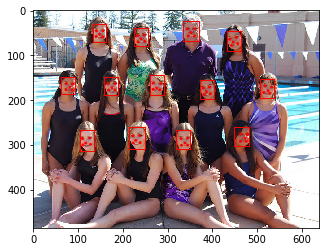

In [25]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

We may want to extract the detected faces and pass them as input to another system.

This can be achieved by extracting the pixel data directly out of the photograph; for example:



```
# get coordinates
x1, y1, width, height = result['box']
x2, y2 = x1 + width, y1 + height
# extract face
face = data[y1:y2, x1:x2]
```

We can demonstrate this by extracting each face and plotting them as separate subplots. You could just as easily save them to file. The draw_faces() below extracts and plots each detected face in a photograph.


```
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
```



The complete example demonstrating this function for the swim team photo is listed below.

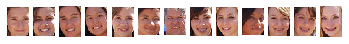

In [26]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

Running the example creates a plot that shows each separate face detected in the photograph of the swim team.